<a href="https://colab.research.google.com/github/allemar92/Data-Science-Projects/blob/master/Beijing_housing_using_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Beijing House Price's prediction using Scikit-Learn**



# Loading the Dataset

In [3]:
import pandas as pd
housing = pd.read_csv("https://github.com/allemar92/Data-Science-Projects/raw/master/Beijing%20housing.zip", compression='zip', encoding="latin1")
housing.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,11,12,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,1,1,¸ß 26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,132.38,2,2,1,2,¸ß 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,1,3,ÖÐ 4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,µ× 21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,81.00,2,1,1,1,ÖÐ 6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [4]:
import numpy as np

np.random.seed(42)

In [5]:
housing.shape

(318851, 26)

Some information about the data

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  318851 non-null  object 
 1   id                   318851 non-null  object 
 2   Lng                  318851 non-null  float64
 3   Lat                  318851 non-null  float64
 4   Cid                  318851 non-null  int64  
 5   tradeTime            318851 non-null  object 
 6   DOM                  160874 non-null  float64
 7   followers            318851 non-null  int64  
 8   totalPrice           318851 non-null  float64
 9   price                318851 non-null  int64  
 10  square               318851 non-null  float64
 11  livingRoom           318851 non-null  object 
 12  drawingRoom          318851 non-null  object 
 13  kitchen              318851 non-null  int64  
 14  bathRoom             318851 non-null  object 
 15  floor            

Now I will select all the variables that I am going to use for my model

In [7]:
housing = housing[['Lng', 'Lat', 'followers','price', 'square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom','ladderRatio','communityAverage',
                   "buildingType","renovationCondition","buildingStructure", "elevator", "fiveYearsProperty", "subway","district", "totalPrice"]]

Let's look for null values

In [8]:
missing_data = housing.isnull()
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print('')

Lng
False    318851
Name: Lng, dtype: int64

Lat
False    318851
Name: Lat, dtype: int64

followers
False    318851
Name: followers, dtype: int64

price
False    318851
Name: price, dtype: int64

square
False    318851
Name: square, dtype: int64

livingRoom
False    318851
Name: livingRoom, dtype: int64

drawingRoom
False    318851
Name: drawingRoom, dtype: int64

kitchen
False    318851
Name: kitchen, dtype: int64

bathRoom
False    318851
Name: bathRoom, dtype: int64

ladderRatio
False    318851
Name: ladderRatio, dtype: int64

communityAverage
False    318388
True        463
Name: communityAverage, dtype: int64

buildingType
False    316830
True       2021
Name: buildingType, dtype: int64

renovationCondition
False    318851
Name: renovationCondition, dtype: int64

buildingStructure
False    318851
Name: buildingStructure, dtype: int64

elevator
False    318819
True         32
Name: elevator, dtype: int64

fiveYearsProperty
False    318819
True         32
Name: fiveYearsProperty, dt

Let's deal with null values by:


*   Dropping the variables with too many Nulls
*   Dropping only the Null values



In [9]:
housing.dropna(subset=["communityAverage"],  inplace=True)

In [10]:
housing["buildingType"].value_counts()

4.000    172228
1.000     84485
3.000     59676
2.000        59
0.500        15
0.333         5
0.048         4
0.125         3
0.250         2
0.429         1
0.375         1
0.667         1
Name: buildingType, dtype: int64

In [11]:
housing.dropna(subset=["buildingType"], inplace=True)
indexnames = housing[housing["buildingType"]<1.0].index
housing.drop(indexnames,axis=0, inplace=True)

In [12]:
housing["buildingStructure"].value_counts()

6    186877
2    115273
4     14018
5       156
3        79
1        45
Name: buildingStructure, dtype: int64

In [13]:
housing["elevator"].value_counts()

1.0    183505
0.0    132943
Name: elevator, dtype: int64

In [14]:
housing["fiveYearsProperty"].value_counts()

1.0    204643
0.0    111805
Name: fiveYearsProperty, dtype: int64

After dealing with null values it is better to reset the index in order to avoid further problems

In [15]:
housing = housing.reset_index()

In [16]:
housing.drop("index", axis=1, inplace=True)

Let's take a look at a description of the numeric variables of the dataset

In [17]:
housing.describe()

,Lng,Lat,followers,price,square,kitchen,ladderRatio,communityAverage,buildingType,renovationCondition,buildingStructure,elevator,fiveYearsProperty,subway,district,totalPrice
count,316448.000000,316448.000000,316448.000000,316448.000000,316448.000000,316448.000000,3.164480e+05,316448.000000,316448.000000,316448.000000,316448.000000,316448.000000,316448.000000,316448.000000,316448.000000,316448.000000
mean,116.418769,39.949555,16.709169,43549.600253,82.838638,0.994634,6.364139e+01,63784.101713,3.010109,2.606627,4.452365,0.579890,0.646688,0.602646,6.767333,347.866290
std,0.111658,0.091156,34.098298,21652.489089,35.909654,0.103302,2.516351e+04,22308.136499,1.269748,1.311668,1.901754,0.493577,0.477999,0.489351,2.811702,224.214266
min,116.072514,39.627030,0.000000,1.000000,7.370000,0.000000,1.400000e-02,10847.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.100000
25%,116.345204,39.893507,0.000000,28090.000000,57.900000,1.000000,2.500000e-01,46410.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,6.000000,205.000000
50%,116.416780,39.934527,5.000000,38777.500000,74.160000,1.000000,3.330000e-01,59025.000000,4.000000,3.000000,6.000000,1.000000,1.000000,1.000000,7.000000,294.000000
75%,116.477613,40.002381,18.000000,53857.250000,98.480000,1.000000,5.000000e-01,76001.000000,4.000000,4.000000,6.000000,1.000000,1.000000,1.000000,8.000000,425.000000
max,116.711337,40.252758,1143.000000,156250.000000,640.000000,3.000000,1.000940e+07,183109.000000,4.000000,4.000000,6.000000,1.000000,1.000000,1.000000,13.000000,4900.000000


And a graphic representetion 

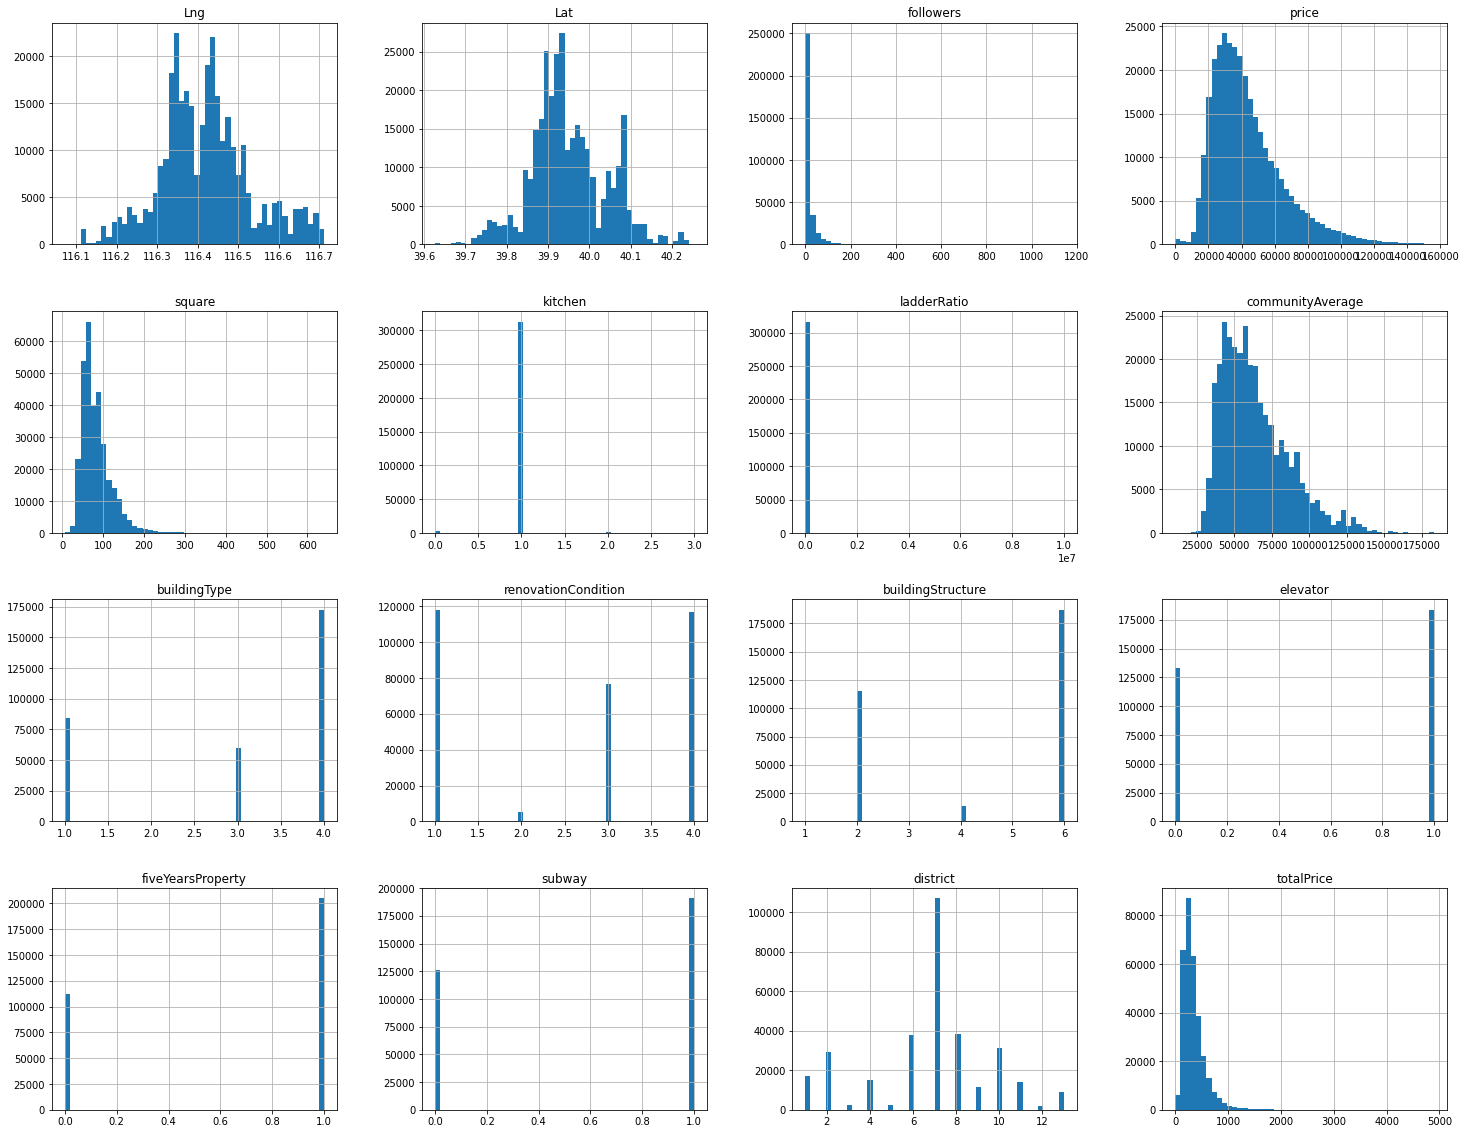

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(25,20))
plt.show()

We need to change some variables data type

In [19]:
categoricals = [ "buildingType", "renovationCondition", "buildingStructure", "elevator", "fiveYearsProperty", "subway","district" ]
for column in categoricals:
  housing[column] = housing[column].astype(str)

This is a plot of the distribution of the houses in the City of Beijing with an indication about the average income of population of the community those are in

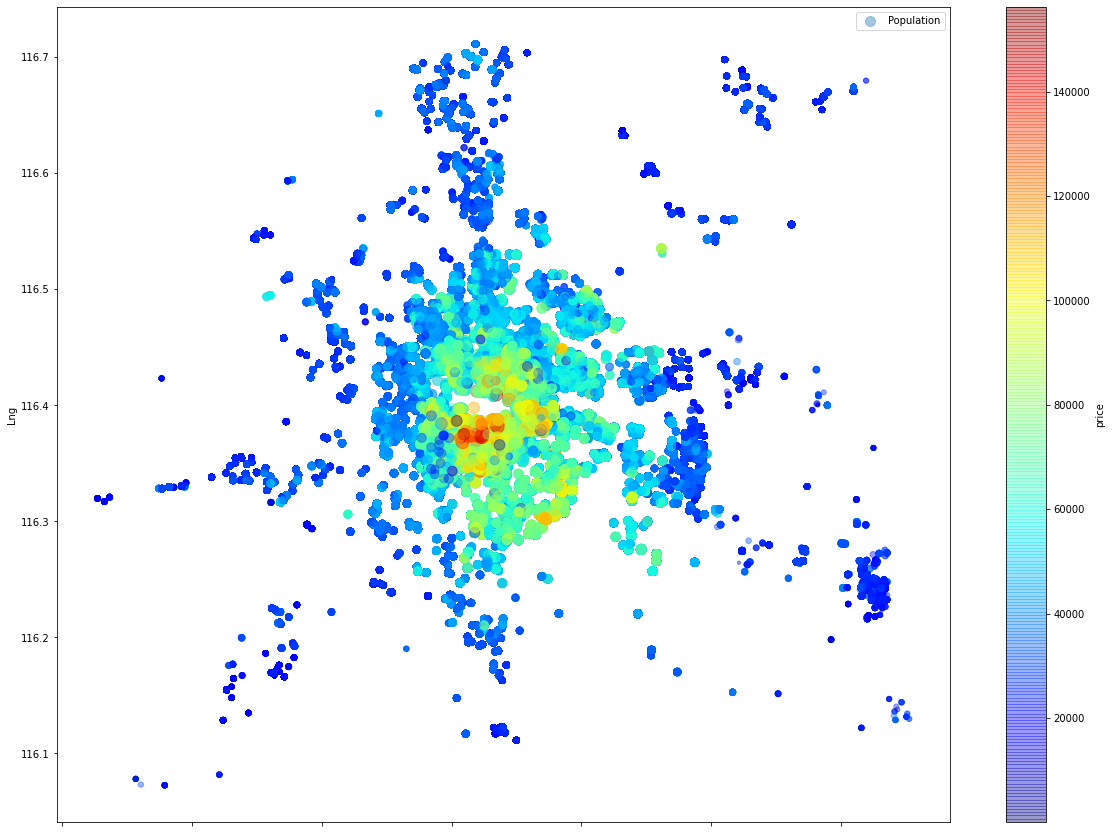

In [20]:
housing.plot(kind="scatter", x="Lat", y="Lng", alpha=0.4,
            s=housing["communityAverage"]/1000, label="Population",figsize=(20,15),
            c="price", cmap=plt.get_cmap("jet"), colorbar=True, legend=True)
plt.show()


We now need to divide the dataset into Train and Test sets, but we need them to be proportionally similar to assure a more precise valuation of the model.
For this reason we need to take a stratified sample as Test set based on the "communityAverage" variable.

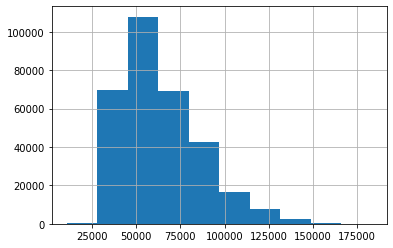

In [21]:
housing["communityAverage"].hist()

Let's choose the cathegorie's bins

In [22]:
housing["comm_avg_cat"] = pd.cut(housing["communityAverage"],
                                     bins=[0., 25000.0, 50000.0, 75000.0, 100000.0,130000.0, np.inf],
                                     labels = [1, 2, 3, 4, 5, 6])

In [23]:
housing["comm_avg_cat"].value_counts()

3    130742
2    102097
4     60765
5     19177
6      3449
1       218
Name: comm_avg_cat, dtype: int64

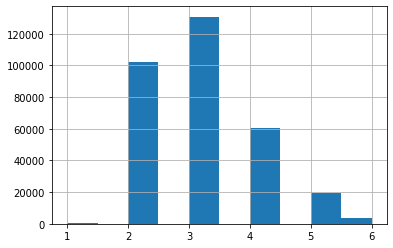

In [24]:
housing["comm_avg_cat"].hist()

Let's use StratifiedShuffleSplit to divide our dataset

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["comm_avg_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

And now let's check if the proportions are the same

In [26]:
strat_test_set["comm_avg_cat"].value_counts() / len(strat_test_set)


3    0.413162
2    0.322626
4    0.192021
5    0.060594
6    0.010902
1    0.000695
Name: comm_avg_cat, dtype: float64

In [27]:
housing["comm_avg_cat"].value_counts() / len(housing)

3    0.413155
2    0.322634
4    0.192022
5    0.060601
6    0.010899
1    0.000689
Name: comm_avg_cat, dtype: float64

In [28]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("comm_avg_cat", axis=1, inplace=True)

In [29]:
strat_test_set.head()

,Lng,Lat,followers,price,square,livingRoom,drawingRoom,kitchen,bathRoom,ladderRatio,communityAverage,buildingType,renovationCondition,buildingStructure,elevator,fiveYearsProperty,subway,district,totalPrice
198795,116.447923,39.934558,11,33725,180.58,2,1,1,2,0.267,56427.0,3.0,3,6,1.0,1.0,1.0,1,609.0
265803,116.309984,39.965790,29,76421,50.51,2,1,1,1,0.333,88754.0,4.0,3,2,0.0,1.0,0.0,8,386.0
79575,116.637340,39.881910,19,34449,89.99,2,1,1,1,0.500,30000.0,3.0,4,6,1.0,1.0,0.0,11,310.0
152407,116.560531,39.925155,11,27228,70.29,2,1,1,1,0.333,49380.0,4.0,3,2,0.0,1.0,1.0,7,191.4
172987,116.605415,39.934236,6,32444,121.75,2,2,1,2,0.667,60026.0,3.0,4,6,1.0,0.0,1.0,7,395.0


In [30]:
strat_train_set.head()

,Lng,Lat,followers,price,square,livingRoom,drawingRoom,kitchen,bathRoom,ladderRatio,communityAverage,buildingType,renovationCondition,buildingStructure,elevator,fiveYearsProperty,subway,district,totalPrice
121972,116.566103,39.928410,0,18477,48.17,1,0,1,1,0.500,56764.0,4.0,1,6,1.0,0.0,1.0,7,89.0
84293,116.461949,40.003018,21,64871,161.86,3,2,1,3,0.333,60653.0,1.0,4,6,1.0,1.0,1.0,7,1050.0
244785,116.308152,39.986695,0,43006,105.80,3,1,1,1,0.333,93192.0,1.0,1,6,1.0,1.0,1.0,8,455.0
21538,116.501162,39.915382,11,50371,60.65,1,0,1,1,0.273,62837.0,1.0,4,6,1.0,1.0,1.0,7,305.5
269151,116.167112,39.936388,0,26325,57.55,2,1,1,1,0.500,44074.0,4.0,1,6,0.0,1.0,1.0,9,151.5


Now let's start working on the Strat_train_set in order to identify the better model for the prediction.

In [31]:
housing = strat_train_set.copy()

This is the correlation matrix of the variables with the total Price of the houses

In [32]:
corr_matrix = housing.corr()
corr_matrix["totalPrice"].sort_values(ascending=False)

totalPrice          1.000000
price               0.641290
square              0.561619
communityAverage    0.433274
followers           0.162215
kitchen             0.082669
Lat                 0.019055
ladderRatio        -0.001212
Lng                -0.074225
Name: totalPrice, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fafeee772e8>,
      dtype=object)

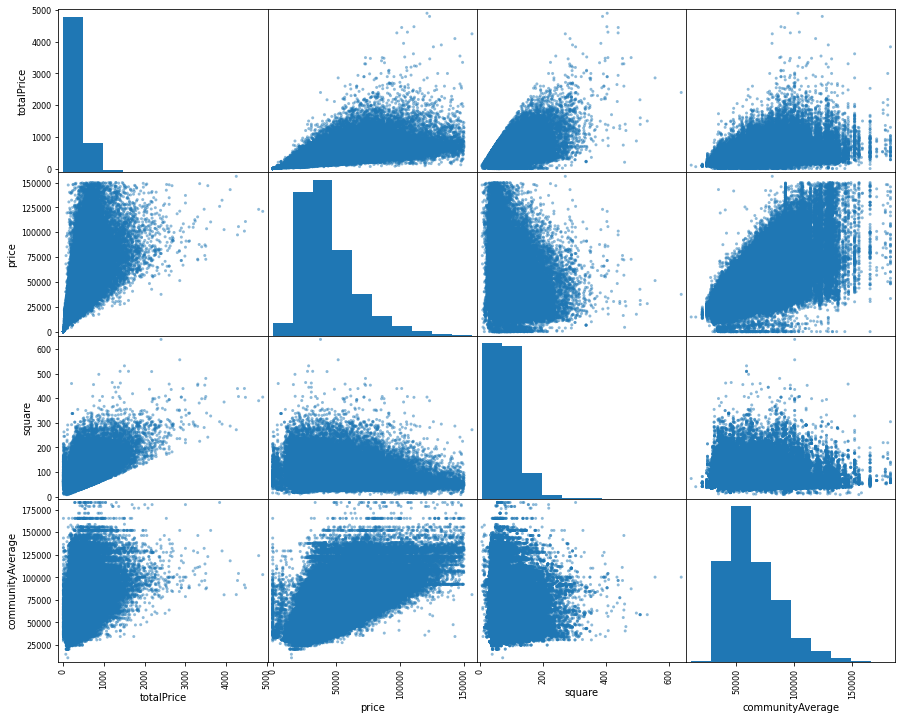

In [33]:
from pandas.plotting import scatter_matrix

attributes = ["totalPrice", "price", "square","communityAverage", "renovationCondition", "elevator", "buildingStructure"]
scatter_matrix(housing[attributes], figsize=(15,12))

And now we are going to use OneHotEncoder to encode those variables to make it easier for the model to word on the data

In [34]:
housing_cat = housing[["buildingType","renovationCondition","buildingStructure", 
                       "elevator", "fiveYearsProperty", "subway","district"]]

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot  = cat_encoder.fit_transform(housing_cat) 
housing_cat_1hot

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

Let's select the numeric variables we will submit to our pipeline for numeric values

In [35]:
housing_num = housing[['Lng', 'Lat', 'followers','price', 'square', 'livingRoom',
                       'drawingRoom', 'kitchen', 'bathRoom','ladderRatio','communityAverage' ]]

We are going to use StandarScaler to scale the numeric variables

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([ 
                         ('std_scaler', StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

Let's create our final pipeline to prepare the data for the Machine Learning algorithms

In [37]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = list(housing_cat)

full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_attribs),
                                   ("cat", OneHotEncoder(), cat_attribs)
                          
])
housing_prepared = full_pipeline.fit_transform(housing)

In [38]:

housing_labels =housing["totalPrice"]



Let's try linear regression first

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:

import numpy as np
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

lin_rmse

77.05005498380154

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                         scoring ="neg_mean_squared_error", cv=10)
lin_rmse_score = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
  print("Scores: ", scores)
  print("Mean: ", scores.mean())
  print("Standard Deviation: ", scores.std())

In [ ]:
display_scores(lin_rmse_score)

Scores:  [74.98651251 76.64423305 80.11261643 77.28974441 77.14121965 78.05866199
 76.1116422  76.78832309 78.91388065 74.60314507]
Mean:  77.06499790399597
Standard Deviation:  1.59038785038019


The error is a little bit high, we should try some other model.

Let's try Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


1.0824383623885014e-16

Decision Tree seems to overfit, let's try Cross Validation

In [ ]:


scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring ="neg_mean_squared_error", cv=10)
tree_rmse_score = np.sqrt(-scores)

In [ ]:
display_scores(tree_rmse_score)

Scores:  [ 7.90706252  8.11558715 13.55345111  7.37063866  8.66766552  9.0296739
  7.70462681 10.52201855  7.8101316   7.05386513]
Mean:  8.773472093823093
Standard Deviation:  1.848279512119239


We should try now some ensemble model, like Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                         scoring ="neg_mean_squared_error", cv=10)
forest_rmse_score = np.sqrt(-forest_scores)
display_scores(forest_scores)


Scores:  [-14.89125782 -22.73579407 -99.05617294 -14.38554047 -21.75167677
 -35.15219453 -25.07142716 -52.9709828  -40.38716397 -12.72766471]
Mean:  -33.912987524587926
Standard Deviation:  24.886257250179742


The model is not performing how expected, we will now use GridSearchCv to tune the model in the best way possible

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
              {"bootstrap":[False], "n_estimators":[ 55, 70, 100], "max_features":[25, 35, 40]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=35, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 35, 'n_estimators': 100}

In [ ]:
cv_res  = grid_search.cv_results_
for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
  print(np.sqrt(-mean_score), params)

7.975846560511056 {'bootstrap': False, 'max_features': 25, 'n_estimators': 55}
8.232764584247064 {'bootstrap': False, 'max_features': 25, 'n_estimators': 70}
8.164198519441296 {'bootstrap': False, 'max_features': 25, 'n_estimators': 100}
6.328593659810159 {'bootstrap': False, 'max_features': 35, 'n_estimators': 55}
6.231388211961627 {'bootstrap': False, 'max_features': 35, 'n_estimators': 70}
6.030363962432254 {'bootstrap': False, 'max_features': 35, 'n_estimators': 100}
6.777831459209403 {'bootstrap': False, 'max_features': 40, 'n_estimators': 55}
6.812823852067936 {'bootstrap': False, 'max_features': 40, 'n_estimators': 70}
6.818935994598206 {'bootstrap': False, 'max_features': 40, 'n_estimators': 100}


We are now going to implement our final model and valuate it on the Strat_test_set since the model has never seen those data

In [ ]:
y_test = strat_test_set["totalPrice"].copy()

X_test = strat_test_set.drop("totalPrice", axis=1)


In [ ]:
final_model = grid_search.best_estimator_



X_test_prepared = full_pipeline.fit_transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

5.085453808267718